# Neural Network and Autoencoder<hr>

### Neural Networks
- A nonlinear function approximator
- Sounds complicated, but it's not
- If you can do linear/logistic regression, you can do this
- A neural network is just a stack of logistic regressions
- Each line is a separate logistic regression unit
- f = sigmoid, ReLU, tanh, ...
- Typical default choice is ReLU
- g = depends on type of problem
- Regression: g(v) = v
- Binary classification: g = sigmoid
- Multi-class: g = softmax

### Autoencoders
- Simplest type of unsupervised neural network we can build
- Key term: "auto" - which means self
- A neural network that predicts (reconstructs) its own input
- Instead of fit(X,Y), we fit(X,X)
- Simplest architecture: 1-hidden layer
- Can use any activation function
- Important feature: hidden layer size < input size
- Forces neural network to learn a compact / efficient representation
- i.e. demensionality reduction / compression
- i.e. it "encodes" the data
- Hence, "autoencoder"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot = False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
class Autoencoder:
    def __init__(self, D, M):
        # represents a batch of training data
        self.X = tf.placeholder(tf.float32, shape=(None,D))
        
        # input -> hidden
        self.W = tf.Variable(tf.random_normal(shape=(D, M)) * 2 / np.sqrt(M))
        self.b = tf.Variable(np.zeros(M).astype(np.float32))
        
        # hidden -> output
        self.V = tf.Variable(tf.random_normal(shape=(M, D)) * 2 / np.sqrt(D))
        self.c = tf.Variable(np.zeros(D).astype(np.float32))
        
        # construct the reconstruction
        self.Z = tf.nn.relu(tf.matmul(self.X, self.W) + self.b)
        logits = tf.matmul(self.Z, self.V) +  self.c
        self.X_hat = tf.nn.sigmoid(logits)
        
        # compute the cost
        self.cost = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(
            labels = self.X,
            logits = logits
        ))
        
        # make the trainer
        self.train_op = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(self.cost)
        
        # set up session and variables for later
        self.init_op = tf.global_variables_initializer()
        self.sess = tf.InteractiveSession()
        self.sess.run(self.init_op)
        
    def fit(self, X, epochs = 10, batch_sz = 300):
        costs = []
        n_batches = len(X) // batch_sz
        print("n_batches:",n_batches)
        for i in range(epochs):
            print('epoch:',i)
            np.random.shuffle(X)
            for j in range(n_batches):
                batch = X[j*batch_sz:(j+1)*batch_sz]
                c, _ = self.sess.run([self.cost, self.train_op], feed_dict = {self.X:batch})
                c /= batch_sz # just debugging
                costs.append(c)
                if j % 100 == 0:
                    print('iter: %d, cost: %.3f' % (j,c))
        plt.plot(costs)
        plt.show()
        
    def predict(self,X):
        return self.sess.run(self.X_hat, feed_dict={self.X:X})

C:\Users\che99\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


n_batches: 183
epoch: 0
iter: 0, cost: 623.367
iter: 100, cost: 336.004
epoch: 1
iter: 0, cost: 224.873
iter: 100, cost: 187.634
epoch: 2
iter: 0, cost: 162.533
iter: 100, cost: 151.709
epoch: 3
iter: 0, cost: 145.031
iter: 100, cost: 131.625
epoch: 4
iter: 0, cost: 125.402
iter: 100, cost: 117.568
epoch: 5
iter: 0, cost: 114.165
iter: 100, cost: 107.487
epoch: 6
iter: 0, cost: 102.737
iter: 100, cost: 99.436
epoch: 7
iter: 0, cost: 97.416
iter: 100, cost: 96.403
epoch: 8
iter: 0, cost: 92.096
iter: 100, cost: 91.931
epoch: 9
iter: 0, cost: 87.988
iter: 100, cost: 87.279


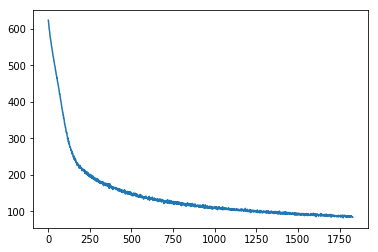

[[1.31673456e-04 1.12839543e-05 8.09038647e-06 4.51746837e-06
  2.25267704e-05 1.13521051e-03 3.90084181e-03 4.47021506e-04
  1.17024640e-04 1.05086496e-04 3.57094032e-05 2.15444470e-05
  4.80011404e-05 7.21513643e-04 3.59364179e-07 1.33852345e-05
  1.69731647e-05 2.01921125e-06 1.52723424e-05 3.77225602e-04
  1.32949732e-04 3.93128430e-05 5.56236500e-06 1.66768004e-05
  1.31472652e-05 4.73305918e-05 3.62893508e-04 2.83413883e-05]
 [4.02395381e-06 2.72326579e-05 1.81970445e-05 3.70729758e-05
  2.58741875e-06 9.96385788e-05 1.08724646e-06 8.70803124e-05
  2.62919522e-04 1.18783792e-04 3.95687166e-05 2.08867554e-04
  1.03310966e-04 8.12615763e-05 5.10022568e-04 2.61856068e-04
  5.03796873e-05 2.41462076e-05 1.12450711e-04 3.13493889e-04
  1.32080777e-05 1.32590823e-04 1.17120417e-05 2.27952587e-05
  4.09577297e-06 2.56403237e-05 2.23492498e-05 3.20898398e-05]
 [2.28614808e-05 1.05361014e-05 2.46394920e-04 3.37053571e-05
  6.73804561e-06 3.30829425e-05 2.91791221e-04 3.69770045e-04
  1.07

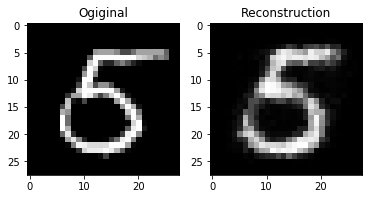

In [ ]:
X = mnist.train.images
Y = mnist.train.labels
model = Autoencoder(784, 200)
model.fit(X)

# plot reconstruction
done = False
while not done:
    i = np.random.choice(len(X))
    x = X[i]
    im = model.predict([x]).reshape(28, 28)
    plt.subplot(1,2,1)
    plt.imshow(x.reshape(28,28), cmap='gray')
    plt.title('Ogiginal')
    plt.subplot(1,2,2)
    plt.imshow(im, cmap='gray')
    plt.title('Reconstruction')
    plt.show()
    
    ans = input('Generate anotehr?')
    if ans and ans[0] in ('n' or 'N'):
        done = True